##Challenge Alura
*Elda Melissa García Retama*

##Importando los datos

In [ ]:
##Importar base de datos desde github
import pandas as pd
url_1='https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv'
url_2='https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv'
url_3='https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv'
url_4='https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv'

tienda1=pd.read_csv(url_1)
tienda2=pd.read_csv(url_2)
tienda3=pd.read_csv(url_3)
tienda4=pd.read_csv(url_4)

## Preview de datos
##Tienda 1
tienda1.head(5)
##Tienda 2
tienda2.head(5)
##Tienda 3
tienda3.head(5)
##Tienda 4
tienda4.head(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


##Analizando los datos


In [ ]:
#Suma de facturación
precio_tienda1=tienda1['Precio']
precio_tienda2=tienda2['Precio']
precio_tienda3=tienda3['Precio']
precio_tienda4=tienda4['Precio']

sumfactienda1=precio_tienda1.sum()
sumfactienda2=precio_tienda2.sum()
sumfactienda3=precio_tienda3.sum()
sumfactienda4=precio_tienda4.sum()

listadeprecios=[precio_tienda1,precio_tienda2,precio_tienda3,precio_tienda4]
precios_compilados = pd.concat(listadeprecios, ignore_index=True)
suma_facturacion = precios_compilados.sum()
print(f'La suma de facturación de la tienda 1 es: {sumfactienda1}, la tienda 2 es de {sumfactienda2} , de la tienda 3 {sumfactienda3} y de la tienda 4 {sumfactienda4}')
print(f'La suma de facturación de las cuatro tiendas es: {suma_facturacion}')


La suma de facturación de la tienda 1 es: 1150880400.0, la tienda 2 es de 1150880400.0 , de la tienda 3 1098019600.0 y de la tienda 4 1038375700.0
La suma de facturación de las cuatro tiendas es: 4438156100.0


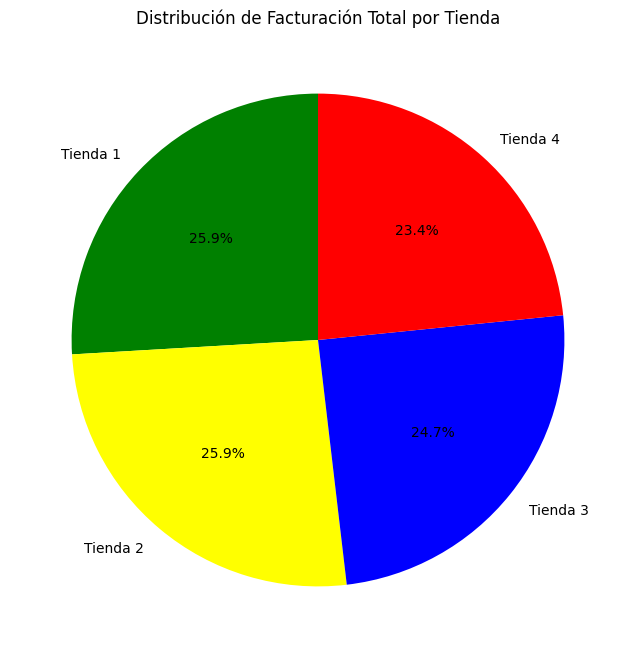

In [ ]:
##Grafico de tiendas con respecto al total
import pandas as pd
import matplotlib.pyplot as plt

totales = [sumfactienda1, sumfactienda2, sumfactienda3, sumfactienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
datos_pastel = pd.Series(totales, index=tiendas)
plt.figure(figsize=(8, 8)) # Ajusta el tamaño para que se vea mejor
plt.pie(
    datos_pastel,
    labels=datos_pastel.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['green', 'yellow', 'blue', 'red']
)
plt.title('Distribución de Facturación Total por Tienda')
plt.show()


In [ ]:

##Ventas por categoría
##Añadir al dataframe el origen de la tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

##Compilar dataframe
listadetiendas=[tienda1,tienda2,tienda3,tienda4]
tiendascompiladas=pd.concat(listadetiendas,ignore_index=True)
print(tiendascompiladas)

##Filtrar por tienda y categorias
##Obtener el total de productos por categoria conforme al precio de venta de los productos
tiendas_top = tiendascompiladas.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index(name='Ventas_Totales')
print(tiendas_top)
##Obtener por tienda el ranking de productos conforme al precio de venta de los productos
ranking_categorias = tiendas_top.groupby('Tienda', group_keys=False).apply(
    lambda x: x.sort_values(by='Ventas_Totales', ascending=False).head(5)
)
print(ranking_categorias)

##Obtener el total de productos por categoria conforme al precio de venta de los productos
tiendas_top1 = tiendascompiladas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Total_Productos')
print(tiendas_top1)

##Obtener por tienda el ranking de productos conforme al precio de venta de los productos
ranking_productos1 = tiendas_top1.groupby('Tienda', group_keys=False).apply(
    lambda x: x.sort_values(by='Total_Productos', ascending=False) .head(5)
)
print(ranking_productos1)


                Producto   Categoría del Producto    Precio  Costo de envío  \
0      Asistente virtual             Electrónicos  164300.0          6900.0   
1        Mesa de comedor                  Muebles  192300.0          8400.0   
2          Juego de mesa                 Juguetes  209600.0         15900.0   
3             Microondas        Electrodomésticos  757500.0         41000.0   
4       Silla de oficina                  Muebles  335200.0         20200.0   
...                  ...                      ...       ...             ...   
9430     Mesa de comedor                  Muebles  227700.0         12600.0   
9431    Silla de oficina                  Muebles  342000.0         18600.0   
9432        Vaso térmico     Deportes y diversión   36700.0          2400.0   
9433        Set de ollas  Artículos para el hogar  151800.0          8300.0   
9434  Cuerda para saltar     Deportes y diversión   11200.0          1300.0   

     Fecha de Compra         Vendedor Lugar de Comp

/tmp/ipython-input-3554096830.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranking_categorias = tiendas_top.groupby('Tienda', group_keys=False).apply(
/tmp/ipython-input-3554096830.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranking_productos1 = tiendas_top1.groupby('Tienda', group_keys=False).apply(


##Insights venta por categoría
Las cuatro tiendas venden principalmente Electrónicos,Electrodomésticos y Muebles.

In [66]:
## Media de envío
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

rate_tienda1 = tienda1[['Calificación', 'Tienda']]
rate_tienda2 = tienda2[['Calificación', 'Tienda']]
rate_tienda3 = tienda3[['Calificación', 'Tienda']]
rate_tienda4 = tienda4[['Calificación', 'Tienda']]

rating = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación': [
        round(rate_tienda1['Calificación'].mean(), 2),
        round(rate_tienda2['Calificación'].mean(), 2),
        round(rate_tienda3['Calificación'].mean(), 2),
        round(rate_tienda4['Calificación'].mean(), 2)
    ]
})

print(rating)



print(f'La calificación promedio de la tienda 1 es de {promratetienda1}, de la tienda 2 es de {promratetienda2}, de la tienda 3 es de {promratetienda3} y de la tienda 4 {promratetienda4} ')


     Tienda  Calificación
0  Tienda 1          3.98
1  Tienda 2          3.98
2  Tienda 3          4.05
3  Tienda 4          4.00
La calificación promedio de la tienda 1 es de 3.98, de la tienda 2 es de 3.98, de la tienda 3 es de 4.05 y de la tienda 4 4.0 


##Insights promedio de satisfacción por tienda
Las tienda 3 es la mejor calificada

In [ ]:
##Categorizando por tienda y producto
productos_top = tiendascompiladas.groupby(['Tienda', 'Producto']).size().reset_index(name='Total_Productos')

##Productos más vendidos
ranking_topprodcutos = productos_top.groupby('Tienda', group_keys=True).apply(
    lambda x: x.sort_values(by='Total_Productos', ascending=False) .head(10)
)
print(ranking_topprodcutos)

##Productos menos vendidos
ranking_lessproductos = productos_top.groupby('Tienda', group_keys=False).apply(
    lambda x: x.sort_values(by='Total_Productos', ascending=True).head(10)
)
print(ranking_lessproductos)

                Tienda                   Producto  Total_Productos
Tienda                                                            
Tienda 1 1    Tienda 1                    Armario               60
         48   Tienda 1              TV LED UHD 4K               60
         33   Tienda 1                 Microondas               60
         40   Tienda 1           Secadora de ropa               58
         32   Tienda 1              Mesa de noche               56
         9    Tienda 1    Bloques de construcción               56
         5    Tienda 1        Balón de baloncesto               55
         8    Tienda 1                  Bicicleta               54
         23   Tienda 1                  Impresora               54
         50   Tienda 1               Vaso térmico               54
Tienda 2 52   Tienda 2                    Armario               60
         99   Tienda 2              TV LED UHD 4K               60
         84   Tienda 2                 Microondas             

/tmp/ipython-input-736576906.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranking_topprodcutos = productos_top.groupby('Tienda', group_keys=True).apply(
/tmp/ipython-input-736576906.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ranking_lessproductos = productos_top.groupby('Tienda', group_keys=False).apply(


##Insights del top de productos más vendidos y menos vendidos
Los productos más vendidos en las tiendas son :Armario, TV LED UHD 4K, Kit de Cama y Cama Box. Mientras que los menos vendidos son: Auriculares con micrófono, Celular ABXY y Bloques de construcción.

In [52]:
##Añadir al dataframe el origen de la tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

##Media de envio
envio_tienda1 = tienda1[['Costo de envío', 'Tienda']]
envio_tienda2 = tienda2[['Costo de envío', 'Tienda']]
envio_tienda3 = tienda3[['Costo de envío', 'Tienda']]
envio_tienda4 = tienda4[['Costo de envío', 'Tienda']]

promedios = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Promedio Costo de Envío': [
        round(envio_tienda1['Costo de envío'].mean(), 2),
        round(envio_tienda2['Costo de envío'].mean(), 2),
        round(envio_tienda3['Costo de envío'].mean(), 2),
        round(envio_tienda4['Costo de envío'].mean(), 2)
    ]
})
print(f'El envio promedio de la tienda 1 es de {promenviotienda1}, de la tienda 2 es de {promenviotienda2}, de la tienda 3 es de {promenviotienda3} y de la tienda 4 {promenviotienda4} ')


El envio promedio de la tienda 1 es de 26018.61, de la tienda 2 es de 26018.61, de la tienda 3 es de 24805.68 y de la tienda 4 23459.46 


##Insights del promedio de envio
La tienda con envios más económicos es la tienda 4 y la tienda con envios más costosos son la tienda 1 y 2

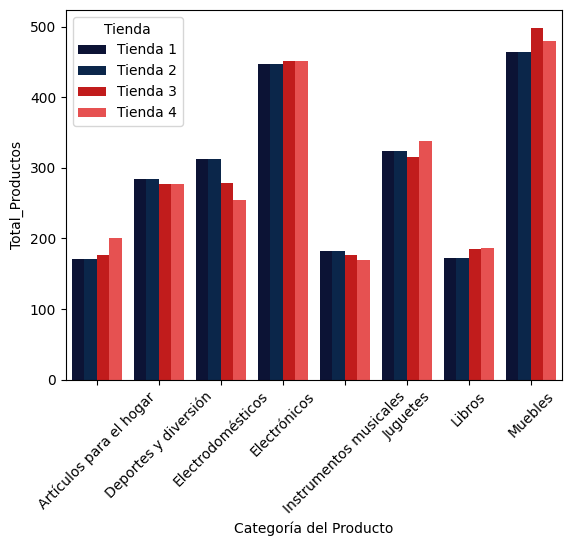

In [ ]:
#Para gráficar Número de ventas x categoría en cada tienda

import seaborn as sns
mypalete = ['#050E3C', '#002455', '#DC0000', '#FF3838']
sns.barplot(
    data=tiendas_top1,
    x='Categoría del Producto',
    y='Total_Productos',
    hue='Tienda',
    palette=mypalete   # <- aquí va tu lista
)
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3717474998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


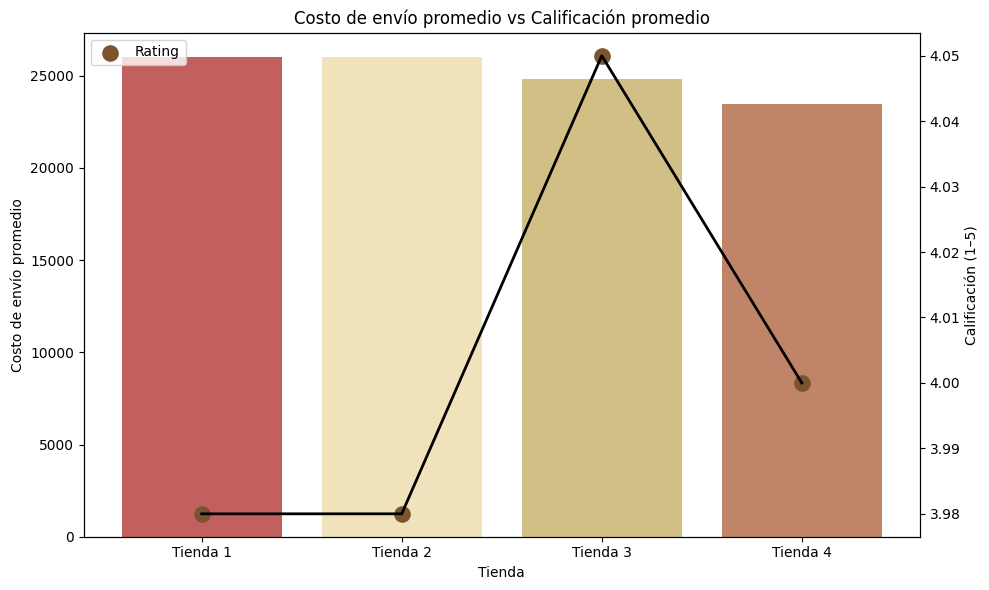

In [95]:
plt.figure(figsize=(10,6))
palette = ["#D34E4E", "#F9E7B2", "#DDC57A", "#CE7E5A"]

ax1 = sns.barplot(
    data=promedios,
    x="Tienda",
    y="Promedio Costo de Envío",
    palette=["#D34E4E", "#F9E7B2", "#DDC57A", "#CE7E5A"]
)

ax1.set_ylabel("Costo de envío promedio")
ax1.set_title("Costo de envío promedio vs Calificación promedio")


ax2 = ax1.twinx()

ax2.scatter(
    rating["Tienda"],
    rating["Calificación"],
    s=120,
    color="#7B542F",
    label="Rating"
)

ax2.set_ylabel("Calificación (1–5)")
plt.xticks(rotation=45)
ax2.legend(loc="upper left")
x_vals = range(len(rating))
y_vals = rating["Calificación"]

plt.plot(
    x_vals,
    y_vals,
    color="black",
    linewidth=2,
)


plt.tight_layout()
plt.show()




## Añadiendo latitud a calificación

In [103]:
import folium
import pandas as pd

df = ratelugartiendas.copy()

# Crear mapa centrado en el promedio de las coordenadas
m = folium.Map(
    location=[df['lat'].mean(), df['lon'].mean()],
    zoom_start=6
)

# Agrupar por ubicación (lat, lon)
grouped = df.groupby(['lat', 'lon'])

for (lat, lon), group in grouped:

    # Construir popup con TODAS las tiendas en esa ubicación
    popup_text = "<b>Tiendas en esta ubicación:</b><br>"

    for _, row in group.iterrows():
        popup_text += f"{row['Tienda']} – ⭐ {row['Calificación']}<br>"

    # Agregar marcador único por coordenada
    folium.Marker(
        location=[lat, lon],
        tooltip=f"{len(group)} tienda(s) aquí",
        popup=popup_text
    ).add_to(m)

# Guardar mapa
m.save("mapa_un_marcador_por_ubicacion.html")

m

